<a href="https://colab.research.google.com/github/SumitKamble24/Telecom-Churn-Analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
## import Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
## Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Read Data File
reviews = pd.read_csv('/content/drive/MyDrive/Drivebit/User Reviews.csv')

In [ ]:
reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
play_store = pd.read_csv('/content/drive/MyDrive/Drivebit/Play Store Data.csv')

In [ ]:
play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
# Information 
play_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


from the above we can see most of the data is in object type so, we need to convert into suitable data type



***Data Preparation and Cleaning***

---



In [ ]:
### Looking For any NaN value in Type column

play_store[play_store.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [ ]:
## There is only one missing value in this column
## we can fill the missing value in type row with "Free"
play_store['Type'].fillna("Free", inplace = True)


In [ ]:
## cheking is it fill with Free or not
## Not it is fill with "Free"
[play_store['Type'].iloc[9148]]

['Free']

In [ ]:
### Looking For any NaN value in Content rating column
### We can see here 

play_store[play_store['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


we observed that there are some missing values 

In [ ]:
## Drop this row from our data frame.
play_store.dropna(subset = ['Content Rating'], inplace=True)

In [ ]:
## drop those unwanted columns.
play_store.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

In [ ]:
## Replacing the missing values with the Modevalue of that entire Rating column.
ValueRating = play_store['Rating'].mode()

In [ ]:
## filling the missing values with the Modevalue of that entire Rating column.

play_store['Rating'].fillna(value=ValueRating[0], inplace = True)

In [ ]:
play_store

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity
...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education
10838,Parkinson Exercices FR,MEDICAL,4.4,3,9.5M,"1,000+",Free,0,Everyone,Medical
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference


In [ ]:
##  converting its type to int 
play_store['Reviews'] = play_store.Reviews.astype(int)

In [ ]:
# For converting the M to Mega i.e. e+6
play_store['Size'] = play_store.Size.apply(lambda x: x.replace('M', 'e+6'))

In [ ]:
# For converting the K to kilo i.e e+3
play_store['Size'] = play_store.Size.apply(lambda x: x.replace('k', 'e+3'))

In [ ]:
# For converting "'Varies with device'" to NaN 
play_store['Size'] = play_store.Size.replace('Varies with device', np.NaN)

In [ ]:
# Converting the string to Numeric type
play_store['Size'] = pd.to_numeric(play_store['Size']) 

In [ ]:
##  remove the +symbol from these values.
play_store['Installs'] = play_store.Installs.apply(lambda x: x.strip('+'))

## remove the , symbol from the numbers.
play_store['Installs'] = play_store.Installs.apply(lambda x: x.replace(',', ''))

## convert it from string type to numeric type
play_store['Installs'] = pd.to_numeric(play_store['Installs'])
play_store['Price'].value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$4.80          1
$154.99        1
$389.99        1
$1.75          1
$1.97          1
Name: Price, Length: 92, dtype: int64

In [ ]:
## strip $ sign
play_store['Price'] = play_store.Price.apply(lambda x: x.strip('$'))
play_store['Price'] = pd.to_numeric(play_store['Price'])

In [ ]:
#Created function for highest installs
highest_Installs = play_store.groupby('Category')[['Installs']].sum().sort_values(by='Installs', ascending=False)

In [ ]:
#printing highest installs
highest_Installs

,Installs
Category,
GAME,35086024415
COMMUNICATION,32647276251
PRODUCTIVITY,14176091369
SOCIAL,14069867902
TOOLS,11452771915
FAMILY,10258263505
PHOTOGRAPHY,10088247655
NEWS_AND_MAGAZINES,7496317760
TRAVEL_AND_LOCAL,6868887146


****Exploratory Analysis and Visualization*****

---



---



**Plot the Content Rating with respect to Apps count to which age categories are allowed to install Apps**

In [ ]:
## Content Rating as a index
x2 = play_store['Content Rating'].value_counts().index

## Content Rating counts
y2 = play_store['Content Rating'].value_counts()

## For loop in x and append to the empty lists 
x2sis = []
y2sis = []

for i in range(len(x2)):
    x2sis.append(x2[i])
    y2sis.append(y2[i])

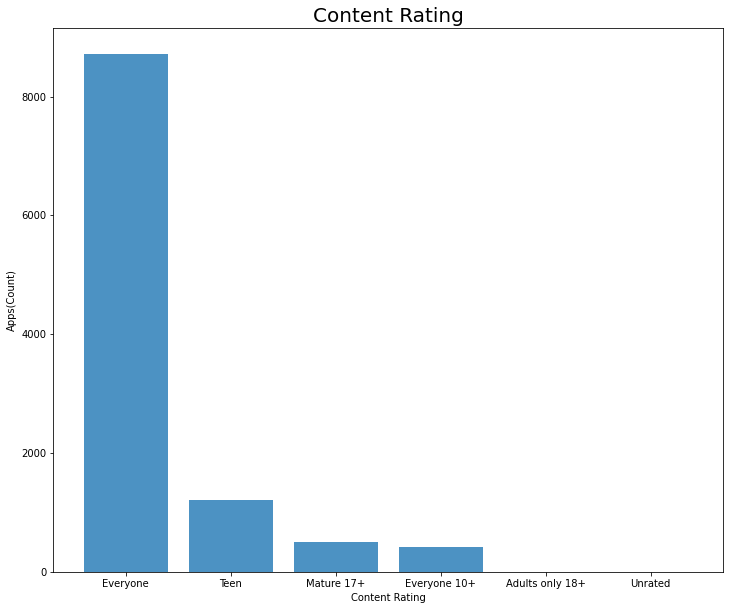

In [ ]:
plt.figure(figsize=(12,10))
plt.bar(x2sis,y2sis,width=0.8, alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

form that the most of the Apps are allowed to download everyone.

**Plot the Top Installed App On Google Playstore**

In [ ]:
## Group by of App and install and sort with descending order
highest_App_Installs = play_store.groupby('App')[['Installs']].sum().sort_values(by='Installs', ascending=False).head(10)
highest_App_Installs


,Installs
App,
Subway Surfers,6000000000
Google News,4000000000
Hangouts,4000000000
Google Drive,4000000000
Google Photos,4000000000
Instagram,4000000000
Candy Crush Saga,3500000000
Maps - Navigate & Explore,3000000000
Google Chrome: Fast & Secure,3000000000


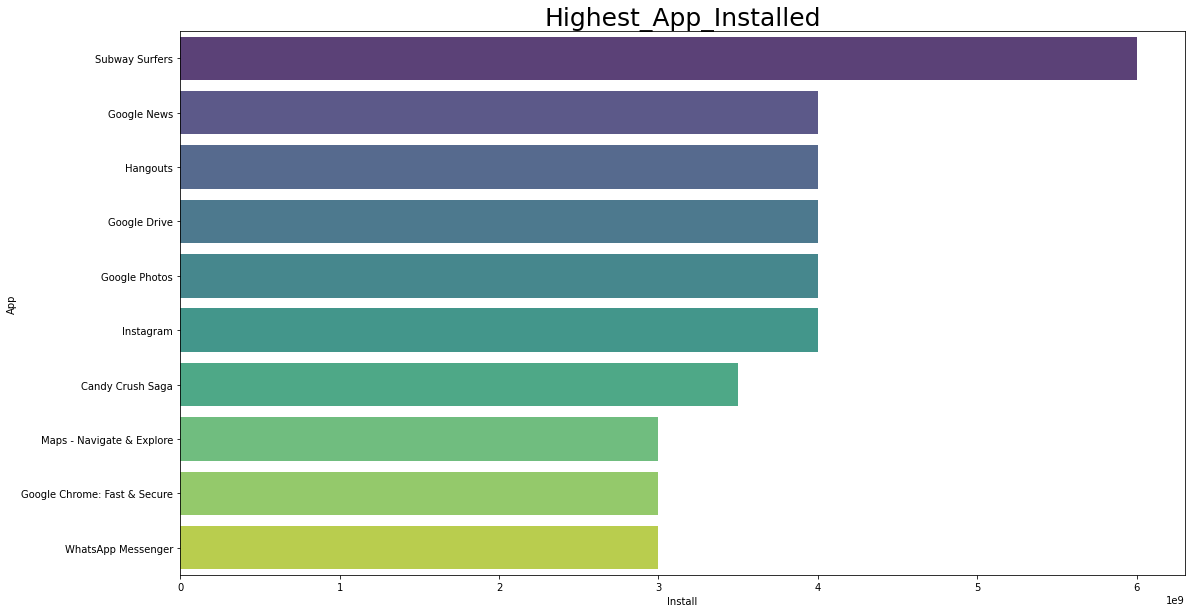

In [ ]:
## Some codes tto append index and there values

xaxis8= []
yaxis8 = []

for i in range(len(highest_App_Installs)):
    xaxis8.append(highest_App_Installs.Installs[i])
    yaxis8.append(highest_App_Installs.index[i])

plt.figure(figsize=(18,10))

plt.xlabel("Install")
plt.ylabel("App")
graph = sns.barplot(x = xaxis8, y = yaxis8, alpha =0.9, palette= "viridis")
graph.set_title("Highest_App_Installed", fontsize = 25);

**For experimenting that which apps are most Installs in each category I created def funcion**

In [ ]:
# To Find Top 5 Installed App in any Catagory 

def top10incategory(str):
    str = str.upper()
    top10 = play_store[play_store['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)

 # top App to plot
    
    plt.figure(figsize=(15,12))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 45, horizontalalignment='right')

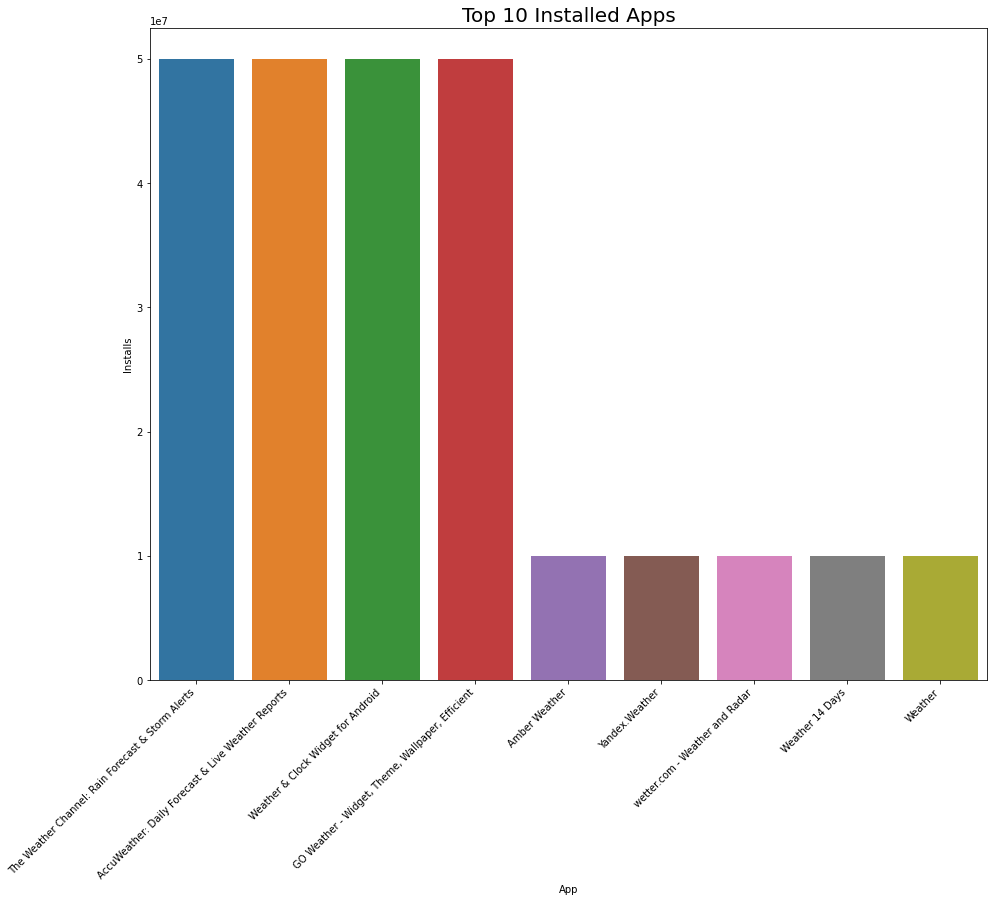

In [ ]:
top10incategory('Weather')

**Top 10 paid App**

In [ ]:
## Top 10 paid App 
top5paidapp=play_store[play_store['Type']=='Paid'].sort_values(by='Price', ascending=False).head(5)
top5paid = play_store.groupby('App')[['Price']].sum().sort_values(by='Price',ascending=False).head(5)

In [ ]:
top5paid

,Price
App,
I'm Rich - Trump Edition,400.00
I am rich,399.99
I am Rich Plus,399.99
most expensive app (H),399.99
💎 I'm rich,399.99


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37666 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25105 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24456 missing from current font.
  font.set_te

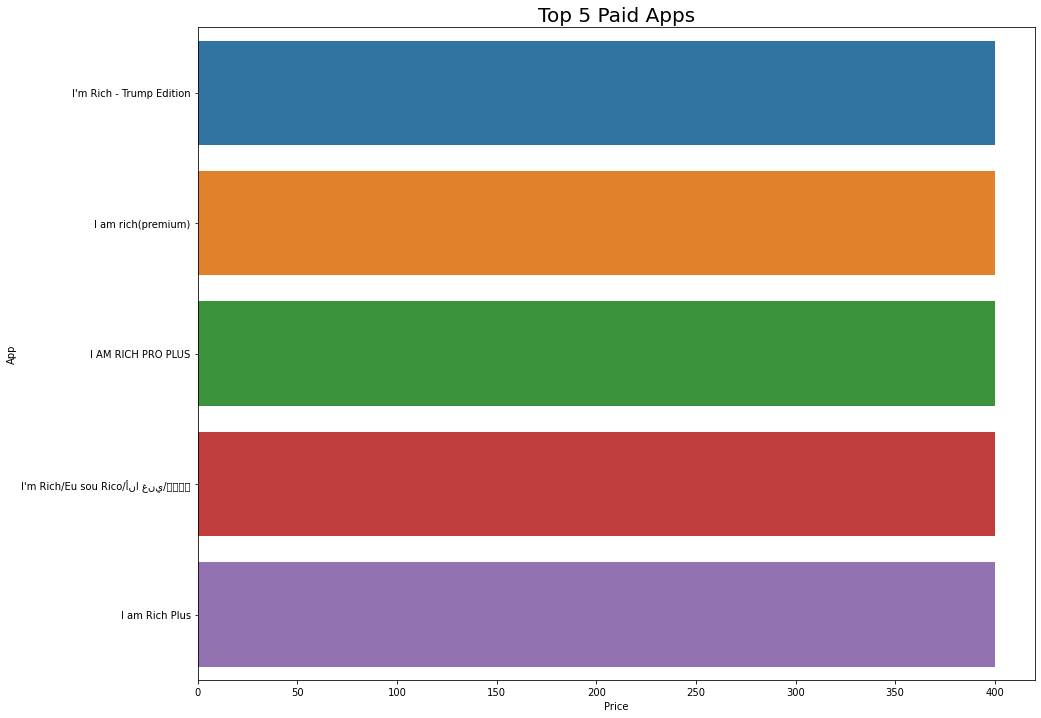

In [ ]:
## Plot Top 5 Paid Apps
plt.figure(figsize=(15,12))
plt.title('Top 5 Paid Apps',size = 20);    
sns.barplot(x = top5paidapp['Price'], y = top5paidapp['App'])
plt.show()

In [ ]:
## to see the paid type 
Paid_Apps_paid = play_store[play_store['Type'] == 'Paid']

## We need only three parameters
earning = Paid_Apps_paid[['App', 'Installs', 'Price']]

In [ ]:
## we add new column in the dataframe
earning['Earnings'] = earning['Installs'] * earning['Price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
earning

,App,Installs,Price,Earnings
234,TurboScan: scan documents and receipts in PDF,100000,4.99,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,100000,4.99,499000.0
290,TurboScan: scan documents and receipts in PDF,100000,4.99,499000.0
291,Tiny Scanner Pro: PDF Doc Scan,100000,4.99,499000.0
427,Puffin Browser Pro,100000,3.99,399000.0
...,...,...,...,...
10735,FP VoiceBot,100,0.99,99.0
10760,Fast Tract Diet,1000,7.99,7990.0
10782,Trine 2: Complete Story,10000,16.99,169900.0
10785,"sugar, sugar",10000,1.20,12000.0


In [ ]:
## Sorting by Earning with Descending order

earning_sorted_by_Earnings = earning.sort_values(by='Earnings', ascending=False).head(50)
earning_sorted_by_Earnings.head()

,App,Installs,Price,Earnings
4347,Minecraft,10000000,6.99,69900000.0
2241,Minecraft,10000000,6.99,69900000.0
5351,I am rich,100000,399.99,39999000.0
5356,I Am Rich Premium,50000,399.99,19999500.0
4034,Hitman Sniper,10000000,0.99,9900000.0


In [ ]:
### Sorting with price
earning_sorted_by_Price = earning_sorted_by_Earnings.sort_values(by='Price', ascending=False)
earning_sorted_by_Price.head()

,App,Installs,Price,Earnings
4367,I'm Rich - Trump Edition,10000,400.00,4000000.0
5362,I Am Rich Pro,5000,399.99,1999950.0
5351,I am rich,100000,399.99,39999000.0
5356,I Am Rich Premium,50000,399.99,19999500.0
5369,I am Rich,5000,399.99,1999950.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


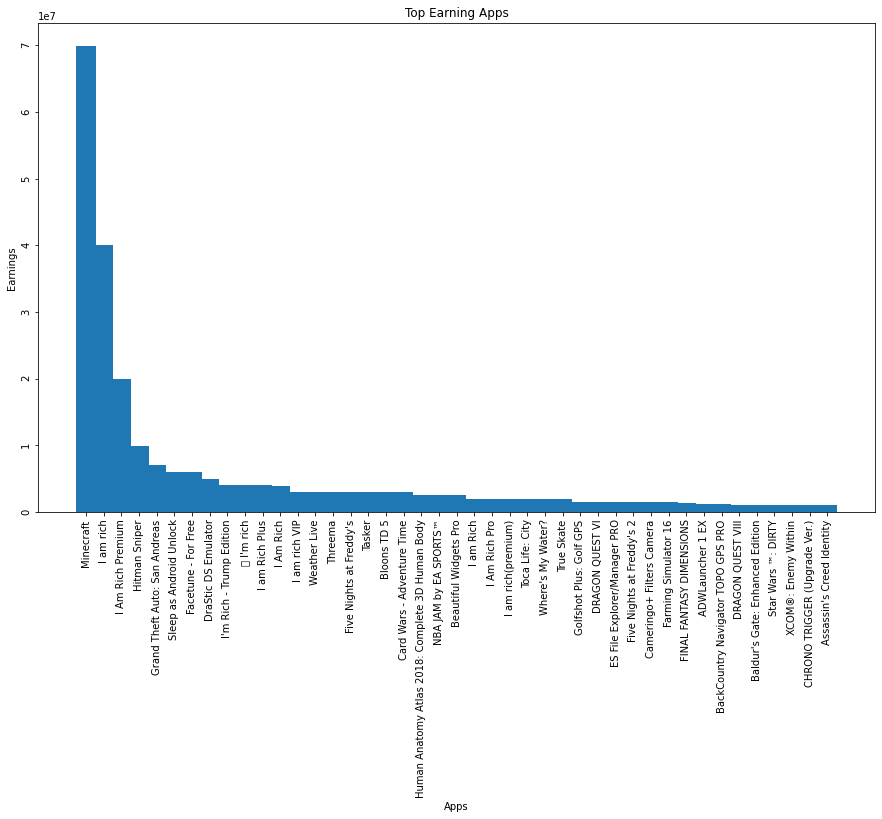

In [ ]:
plt.figure(figsize=(15,9))
plt.bar(earning_sorted_by_Earnings.App, earning_sorted_by_Earnings.Earnings, width=1.1, label=earning_sorted_by_Earnings.Earnings)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

from that we can see Minecraft app is earn most

**Plot which App has highest price to install**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


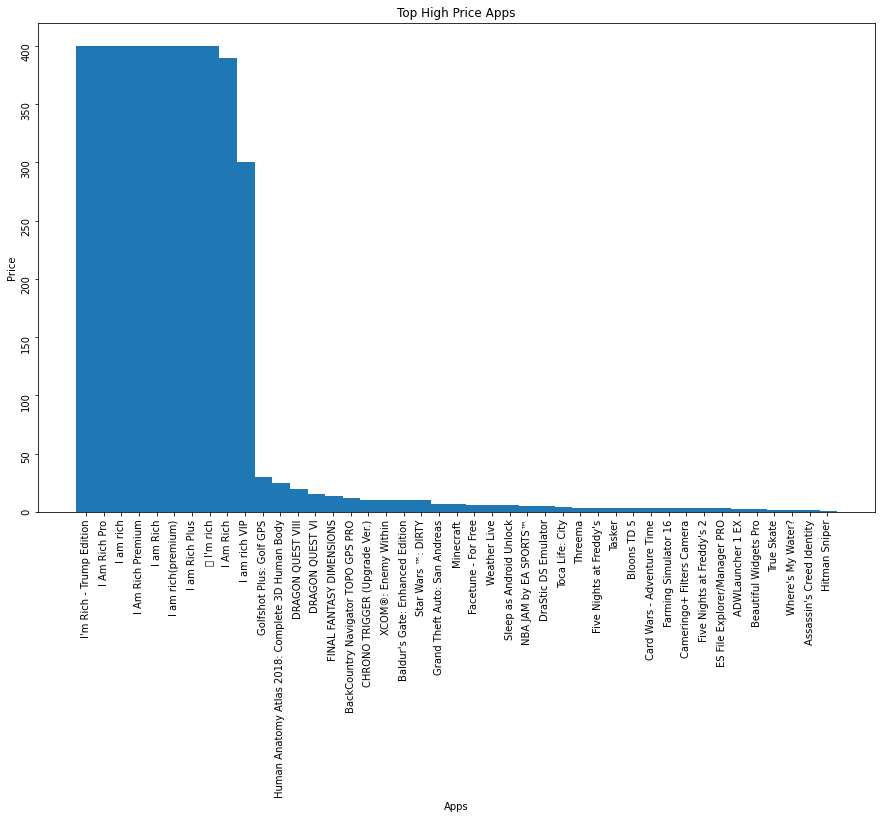

In [ ]:
### Bar plot

plt.figure(figsize=(15,9))
plt.bar(earning_sorted_by_Price.App, earning_sorted_by_Price.Price, width=1.1, label=earning_sorted_by_Price.Earnings)
plt.xlabel("Apps")
plt.ylabel("Price")
plt.tick_params(rotation=90)
plt.title("Top High Price Apps");

From the above we can see some Apps with there price

**To plot which genres have most Apps**

In [ ]:
## Count the values of each genres

top_Apps_in_Genres = play_store['Genres'].value_counts().head(50)

In [ ]:
top_Apps_in_Genres

Tools                          842
Entertainment                  623
Education                      549
Medical                        463
Business                       460
Productivity                   424
Sports                         398
Personalization                392
Communication                  387
Lifestyle                      381
Finance                        366
Action                         365
Health & Fitness               341
Photography                    335
Social                         295
News & Magazines               283
Shopping                       260
Travel & Local                 257
Dating                         234
Books & Reference              231
Arcade                         220
Simulation                     200
Casual                         193
Video Players & Editors        173
Puzzle                         140
Maps & Navigation              137
Food & Drink                   127
Role Playing                   109
Strategy            

In [ ]:
## empty lists for appending

xaxis3 = []
yaxis3 = []

for i in range(len(top_Apps_in_Genres)):
    xaxis3.append(top_Apps_in_Genres.index[i])
    yaxis3.append(top_Apps_in_Genres[i])

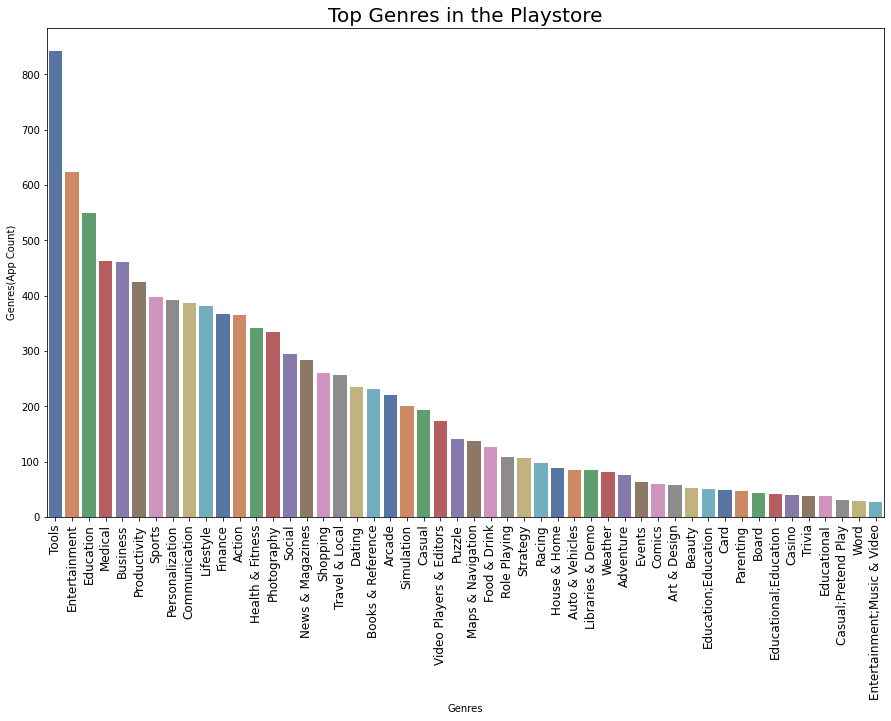

In [ ]:
## ploting Barplot with the help of seaborn

plt.figure(figsize=(15,9))
plt.ylabel('Genres(App Count)')
plt.xlabel('Genres')
graph = sns.barplot(x=xaxis3,y=yaxis3,palette="deep")
graph.set_xticklabels(graph.get_xticklabels(), rotation=90, fontsize=12)
graph.set_title("Top Genres in the Playstore", fontsize = 20);

From the above plot the Tool Genres containig highest number of Apps

**We ar ploting Bar plot for to see which categoty of app has most installs.**

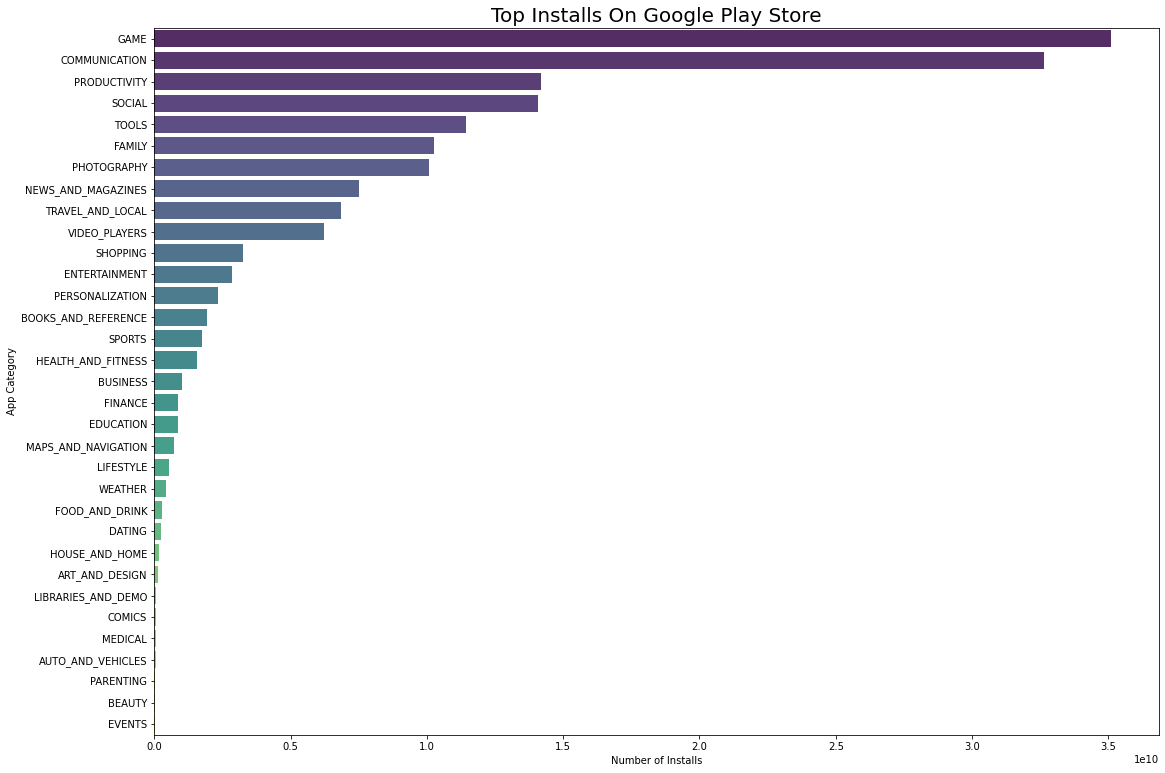

In [ ]:

x2sis = []
y2sis = []

for i in range(len(highest_Installs)):
    x2sis.append(highest_Installs.Installs[i])
    y2sis.append(highest_Installs.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Number of Installs")
plt.ylabel("App Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9, palette= "viridis")
graph.set_title("Top Installs On Google Play Store", fontsize = 20);

From the above graph we can see Game category is the most install app.

**Ploting Frequency distribution graph**

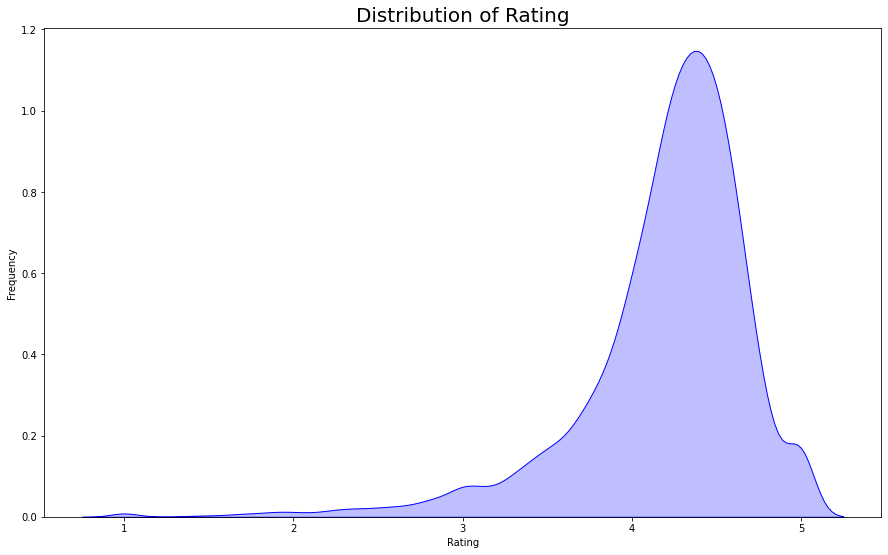

In [ ]:
plt.figure(figsize=(15,9))
plt.xlabel("Rating")
plt.ylabel("Frequency")
graph = sns.kdeplot(play_store.Rating, color="Blue", shade = True)
plt.title('Distribution of Rating',size = 20);


From the above graph we can see the rating of 4 - 4.8 has more frequency.

###PLOTTING REVIEWS GRAPH

In [ ]:
highest_Reviews = play_store.groupby('Category')[['Reviews']].sum().sort_values(by='Reviews', ascending=False)

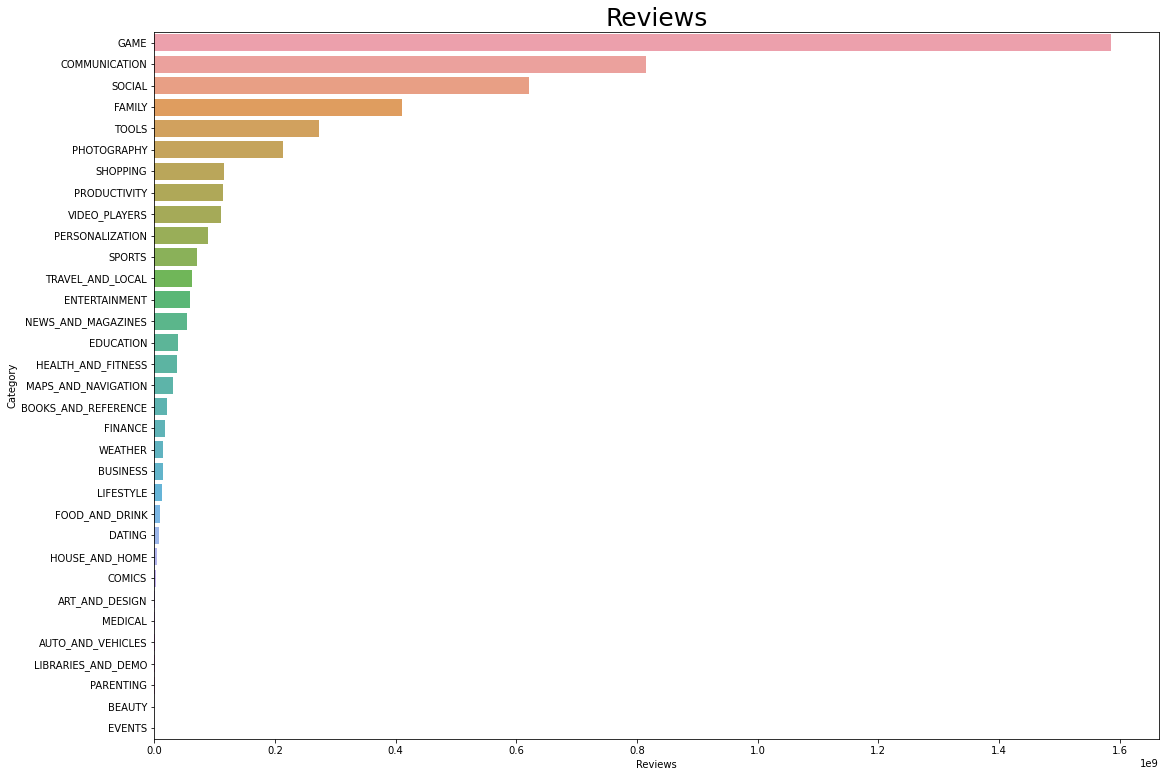

In [ ]:
x5sis = []
y5sis = []

for i in range(len(highest_Reviews)):
    x5sis.append(highest_Reviews.Reviews[i])
    y5sis.append(highest_Reviews.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Reviews")
plt.ylabel("Category")
graph = sns.barplot(x = x5sis, y = y5sis, alpha =0.9)
sns.set_palette(sns.color_palette("Paired"))
graph.set_title("Reviews", fontsize = 25);

From thwe above graph we can see the game category has most reviews.

###PLOTTING THE SIZE GRAPH

In [ ]:
play_store["Size"] = pd.to_numeric(play_store["Size"])

In [ ]:
highest_Size = play_store.groupby('Category')[['Size']].sum().sort_values(by='Size', ascending=False)

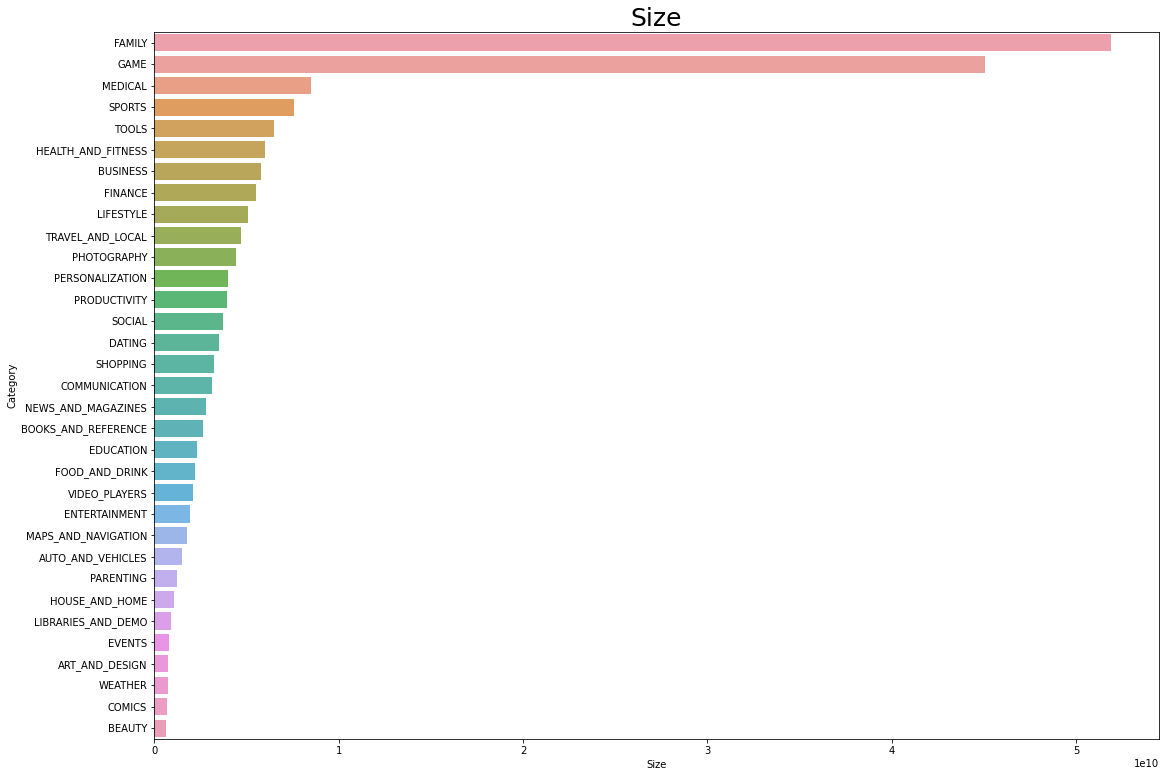

In [ ]:
x3sis = []
y3sis = []

for i in range(len(highest_Size)):
    x3sis.append(highest_Size.Size[i])
    y3sis.append(highest_Size.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Size")
plt.ylabel("Category")
graph = sns.barplot(x = x3sis, y = y3sis, alpha =0.9)
sns.set_palette(sns.color_palette("Paired"))
graph.set_title("Size", fontsize = 25);

From the above graph family category taken most of the space

###PLOTTING PRICE GRAPH

In [ ]:
play_store["Price"] = pd.to_numeric(play_store["Price"])

In [ ]:
highest_Price = play_store.groupby('Category')[['Price']].sum().sort_values(by='Price', ascending=False)

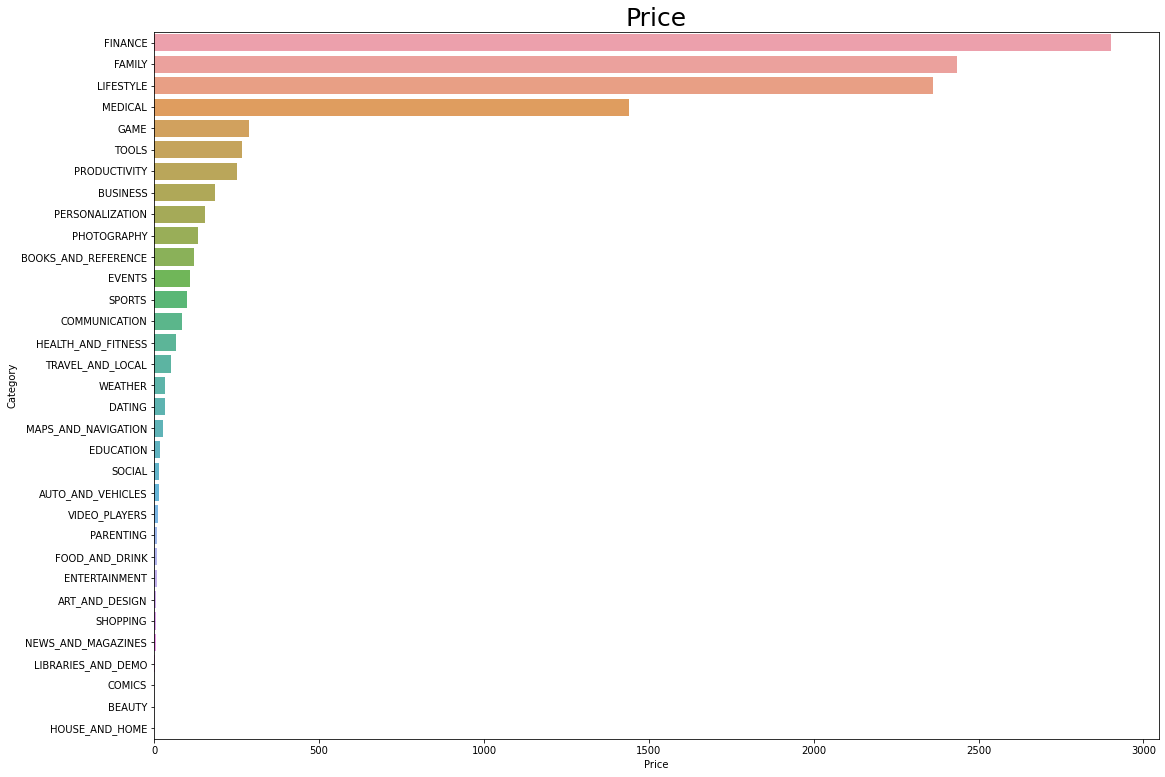

In [ ]:
x2sis = []
y2sis = []

for i in range(len(highest_Price)):
    x2sis.append(highest_Price.Price[i])
    y2sis.append(highest_Price.index[i])

plt.figure(figsize=(18,13))

plt.xlabel("Price")
plt.ylabel("Category")
graph = sns.barplot(x = x2sis, y = y2sis, alpha =0.9)
sns.set_palette(sns.color_palette("Paired"))
graph.set_title("Price", fontsize = 25);

Finacnce category has mostly paid apps. 

**Ploting the Pie chart for Free Apps and Paid apps In Play store** 

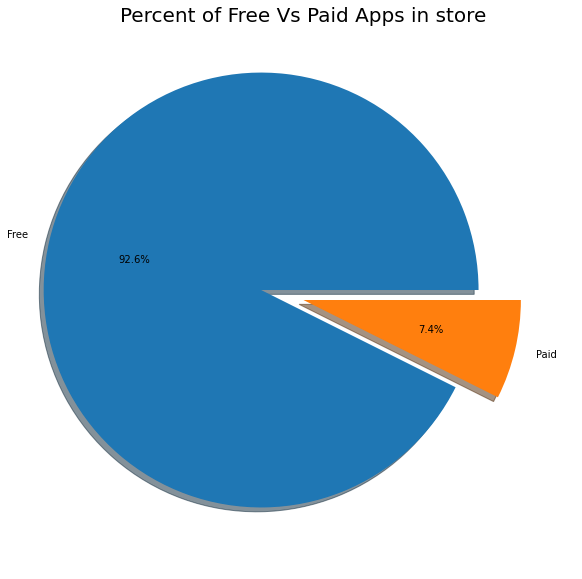

In [ ]:
## Percent of Free Vs Paid Apps in store
plt.figure(figsize=(10,10))
labels = play_store['Type'].value_counts(sort = True).index
sizes = play_store['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Percent of Free Vs Paid Apps in store',size = 20)
plt.show()

In the play store 92.6% of the app are the free apps. and 7.4% of the apps are paid apps

**Top categories on Google Playstore**

In [ ]:
## category as a index
y = play_store['Category'].value_counts().index

## Categoy counts
x = play_store['Category'].value_counts()

## Empty lists
xsis = []
ysis = []

## For loop in x and append to the empty lists 
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

In [ ]:
x

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

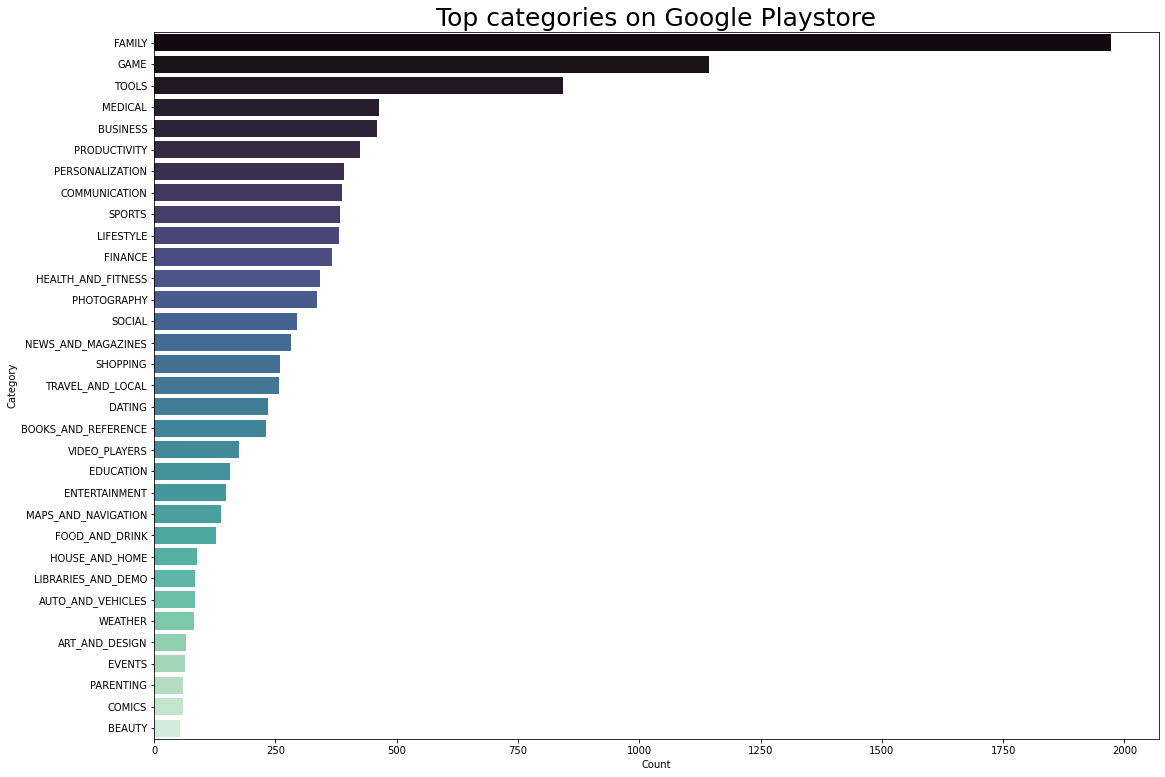

In [ ]:
## Plot Top categories on Google Playstore

plt.figure(figsize=(18,13))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= 'mako')
graph.set_title("Top categories on Google Playstore", fontsize = 25);


From these we can see that family category is highest 